In [136]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings(action='ignore')

In [64]:
weather=pd.read_csv('weatherAUS.csv')

In [65]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Explanatory Data Analysis

In [66]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [67]:
weather.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [68]:
weather.keys()

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [69]:
weather.info

<bound method DataFrame.info of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     Wi

In [70]:
weather.shape

(8425, 23)

In [71]:
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [72]:
#finding the null values
weather.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [73]:
weather['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [74]:
weather['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [75]:
weather['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [76]:
#dropping the unnecessary columns
weather.drop(['Evaporation','Sunshine','Date','WindGustDir','Location'],axis=1,inplace=True)

In [77]:
#drop null values
weather.dropna(inplace=True)

In [78]:
weather.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [80]:
#replacing all string data into int form of data
from sklearn import preprocessing




In [81]:
weather['WindDir9am']=a.fit_transform(weather['WindDir9am'])
weather['WindDir3pm']=a.fit_transform(weather['WindDir3pm'])


In [82]:
weather['RainToday']=a.fit_transform(weather['RainToday'])


In [83]:
weather.replace({'RainTomorrow':{'Yes':0,'No':1}},inplace=True)

In [84]:
weather.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int64
dtype: object

# Statistical Summary

In [85]:
#correlation
weather.corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.736366,0.076509,0.164608,-0.105469,-0.162317,0.094282,0.131570,-0.095526,0.030994,-0.426314,-0.426008,0.089423,0.024922,0.867194,0.711675,-0.002418,-0.048354
MaxTemp,0.736366,1.000000,-0.119433,0.127996,-0.283569,-0.183121,0.056775,0.079818,-0.448026,-0.458650,-0.318974,-0.407250,-0.344827,-0.334100,0.892377,0.978412,-0.298704,0.218519
Rainfall,0.076509,-0.119433,1.000000,0.103925,0.120988,0.051335,0.048964,0.034158,0.301654,0.279089,-0.094768,-0.049666,0.216541,0.185980,-0.042786,-0.118027,0.489148,-0.264562
WindGustSpeed,0.164608,0.127996,0.103925,1.000000,-0.214286,0.037359,0.669995,0.696980,-0.218427,-0.111087,-0.362966,-0.329990,0.056386,0.121550,0.119981,0.088383,0.085395,-0.224508
WindDir9am,-0.105469,-0.283569,0.120988,-0.214286,1.000000,0.271822,-0.215521,-0.110329,0.183551,0.231279,0.023106,0.115787,0.134434,0.073187,-0.181961,-0.290719,0.205505,-0.053315
WindDir3pm,-0.162317,-0.183121,0.051335,0.037359,0.271822,1.000000,-0.007335,0.083289,0.030248,0.026892,-0.135377,-0.039081,0.100082,0.064144,-0.173269,-0.198945,0.135223,-0.036361
WindSpeed9am,0.094282,0.056775,0.048964,0.669995,-0.215521,-0.007335,1.000000,0.526245,-0.314205,-0.167630,-0.142071,-0.112790,0.005183,0.072326,0.054676,0.047861,0.024570,-0.079734
WindSpeed3pm,0.131570,0.079818,0.034158,0.696980,-0.110329,0.083289,0.526245,1.000000,-0.158426,-0.070465,-0.247841,-0.195801,0.034128,0.043799,0.120962,0.052323,0.035898,-0.091390
Humidity9am,-0.095526,-0.448026,0.301654,-0.218427,0.183551,0.030248,-0.314205,-0.158426,1.000000,0.689899,0.104758,0.155102,0.497248,0.382820,-0.382797,-0.436606,0.464116,-0.346110
Humidity3pm,0.030994,-0.458650,0.279089,-0.111087,0.231279,0.026892,-0.167630,-0.070465,0.689899,1.000000,-0.029521,0.054122,0.525654,0.529279,-0.189063,-0.523565,0.399864,-0.511016


In [86]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000,4545.000000
mean,14.042794,24.220396,3.255754,41.357316,7.539934,7.668647,16.221562,20.103410,66.376898,52.316392,1017.455138,1015.088251,4.511331,4.503850,18.654763,22.730715,0.275908,0.722552
std,5.225606,6.164010,10.602088,14.008704,4.767042,4.647404,9.440463,8.822529,16.938277,18.604725,6.672054,6.634544,2.834166,2.724683,5.589021,6.012463,0.447020,0.447789
min,-1.300000,8.200000,0.000000,11.000000,0.000000,0.000000,2.000000,2.000000,11.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,10.100000,19.800000,0.000000,31.000000,3.000000,3.000000,9.000000,13.000000,55.000000,40.000000,1013.000000,1010.400000,1.000000,2.000000,14.700000,18.500000,0.000000,0.000000
50%,14.000000,23.600000,0.000000,39.000000,8.000000,8.000000,15.000000,20.000000,67.000000,52.000000,1017.400000,1015.200000,5.000000,5.000000,18.500000,22.200000,0.000000,1.000000
75%,18.000000,28.400000,1.600000,50.000000,12.000000,12.000000,22.000000,26.000000,79.000000,65.000000,1021.800000,1019.600000,7.000000,7.000000,22.900000,26.800000,1.000000,1.000000
max,28.500000,43.600000,225.000000,102.000000,15.000000,15.000000,61.000000,52.000000,100.000000,99.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,1.000000,1.000000


# Feature Engineering

In [87]:
x=weather.drop(columns=['Rainfall'],axis=1)
print(x)

      MinTemp  MaxTemp  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
4        17.5     32.3           41.0           1           7           7.0   
11       15.9     21.7           31.0           4           1          15.0   
12       15.9     18.6           61.0           6           6          28.0   
16       14.1     20.9           22.0          11           0          11.0   
17       13.5     22.9           63.0           3          14           6.0   
...       ...      ...            ...         ...         ...           ...   
8385     24.9     34.3           39.0           1           4          17.0   
8393     14.6     26.3           37.0          11           8          19.0   
8397     12.7     22.2           37.0           0           2          19.0   
8398      9.4     22.7           35.0           9           0          13.0   
8423      7.8     27.0           28.0          10           3          13.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Press

In [88]:
y=weather['Rainfall']
print(y)

4        1.0
11       2.2
12      15.6
16       0.0
17      16.8
        ... 
8385     0.0
8393     0.0
8397     0.0
8398     0.0
8423     0.0
Name: Rainfall, Length: 4545, dtype: float64


# Data Visualization

# Correlation Map

<Figure size 2000x2000 with 0 Axes>

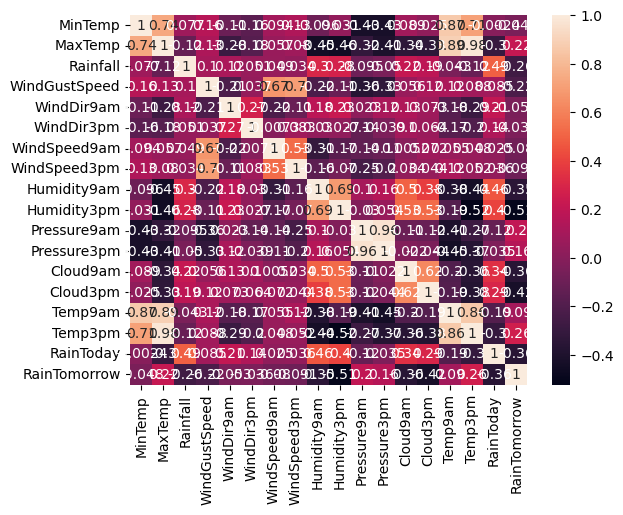

<Figure size 2000x2000 with 0 Axes>

In [92]:
corr_hmap = weather.corr()
heatmap = sns.heatmap(weather.corr(), annot=True)
plt.figure(figsize=(20, 20),linewidth=1)

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

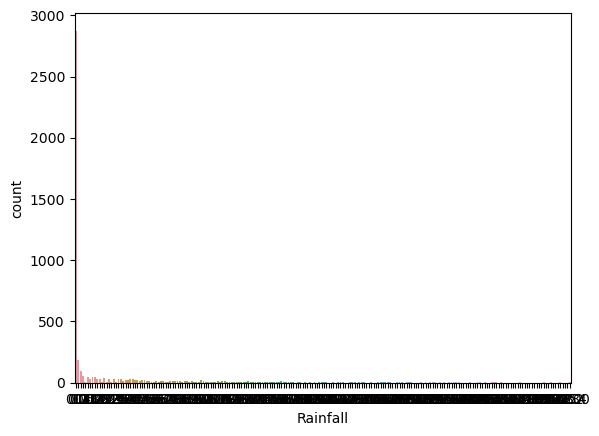

In [93]:
sns.countplot(x ='Rainfall', data = weather)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

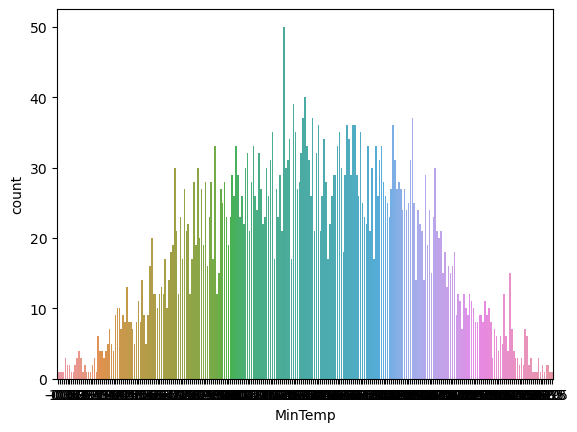

In [94]:
sns.countplot(x ='MinTemp', data = weather)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

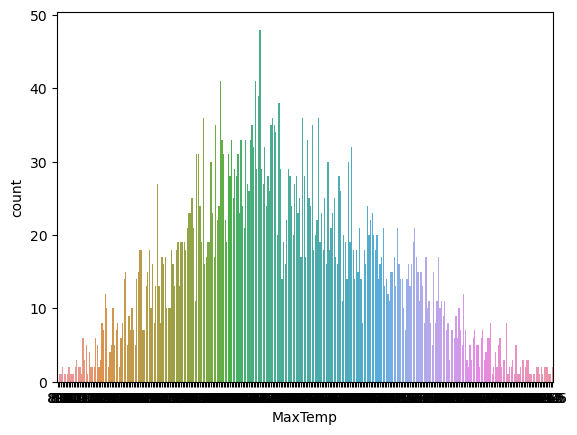

In [95]:
sns.countplot(x ='MaxTemp', data = weather)
plt.show

# Dist Plot

C:\Users\saura\AppData\Local\Temp\ipykernel_19584\787792195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather['Rainfall'])


<function matplotlib.pyplot.show(close=None, block=None)>

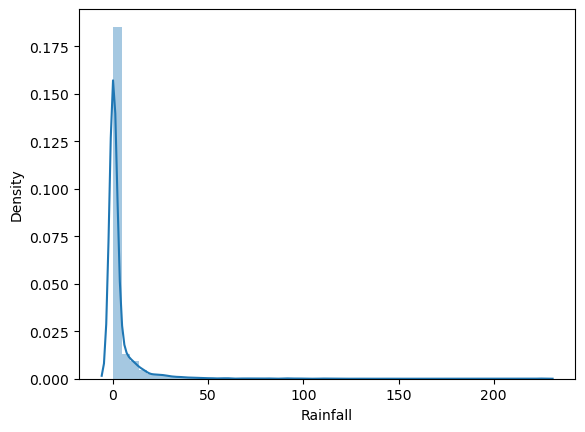

In [97]:
   sns.distplot(weather['Rainfall'])
plt.show

C:\Users\saura\AppData\Local\Temp\ipykernel_19584\2949233072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather['WindDir9am'])


<function matplotlib.pyplot.show(close=None, block=None)>

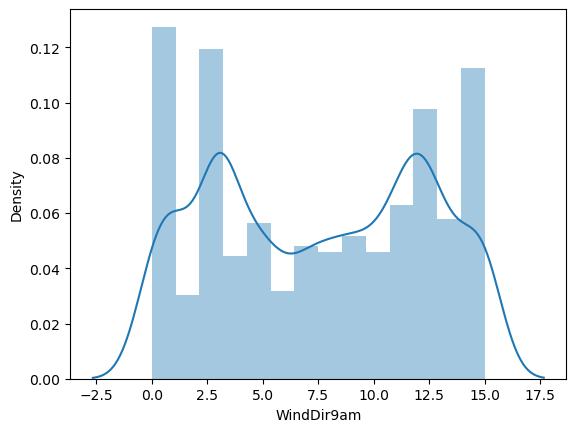

In [98]:
sns.distplot(weather['WindDir9am'])
plt.show

C:\Users\saura\AppData\Local\Temp\ipykernel_19584\2254963496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather['WindDir3pm'])


<function matplotlib.pyplot.show(close=None, block=None)>

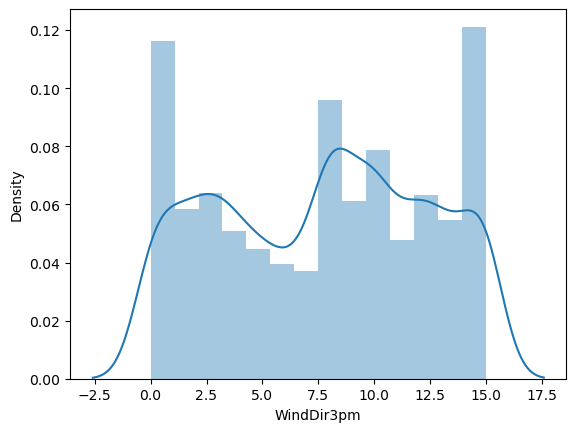

In [99]:
sns.distplot(weather['WindDir3pm'])
plt.show

C:\Users\saura\AppData\Local\Temp\ipykernel_19584\658986124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather['Pressure9am'])


<function matplotlib.pyplot.show(close=None, block=None)>

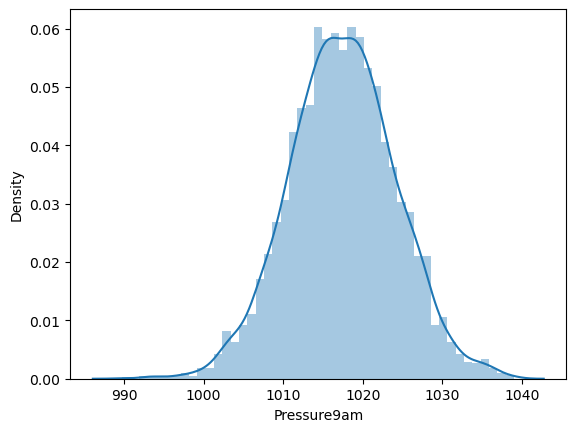

In [100]:
sns.distplot(weather['Pressure9am'])
plt.show

# Bar Plot

<Axes: xlabel='Rainfall', ylabel='Temp9am'>

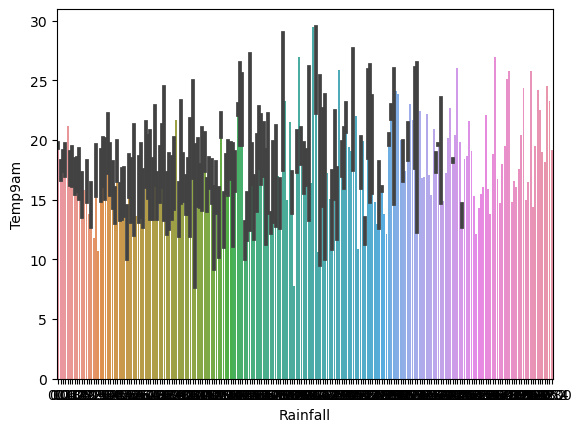

In [101]:

sns.barplot(x='Rainfall',y='Temp9am',data=weather)

<Axes: xlabel='Rainfall', ylabel='RainToday'>

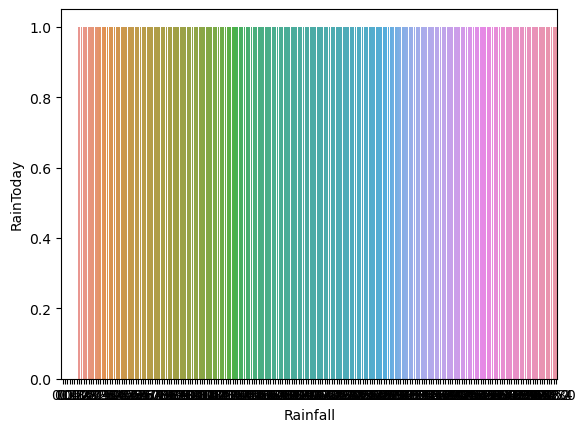

In [102]:

sns.barplot(x='Rainfall',y='RainToday',data=weather)

<Axes: xlabel='Rainfall', ylabel='Humidity3pm'>

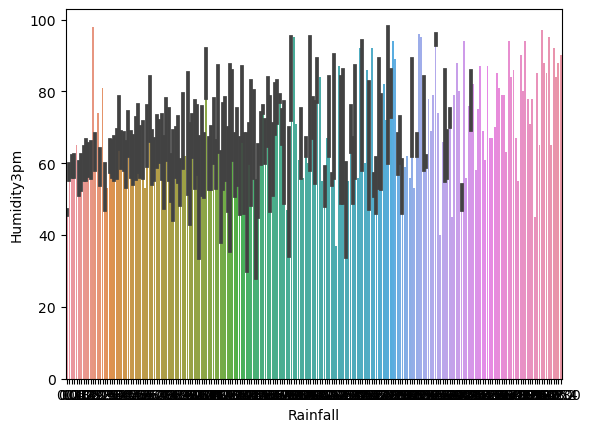

In [103]:

sns.barplot(x='Rainfall',y='Humidity3pm',data=weather)

<Axes: xlabel='Rainfall', ylabel='MaxTemp'>

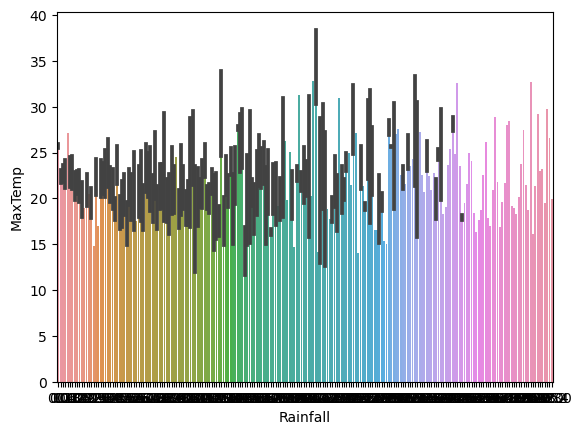

In [104]:
sns.barplot(x='Rainfall',y='MaxTemp',data=weather)

# Box PLot

MinTemp             Axes(0.125,0.747241;0.133621x0.132759)
MaxTemp          Axes(0.285345,0.747241;0.133621x0.132759)
Rainfall          Axes(0.44569,0.747241;0.133621x0.132759)
WindGustSpeed    Axes(0.606034,0.747241;0.133621x0.132759)
WindDir9am       Axes(0.766379,0.747241;0.133621x0.132759)
WindDir3pm          Axes(0.125,0.587931;0.133621x0.132759)
WindSpeed9am     Axes(0.285345,0.587931;0.133621x0.132759)
WindSpeed3pm      Axes(0.44569,0.587931;0.133621x0.132759)
Humidity9am      Axes(0.606034,0.587931;0.133621x0.132759)
Humidity3pm      Axes(0.766379,0.587931;0.133621x0.132759)
Pressure9am         Axes(0.125,0.428621;0.133621x0.132759)
Pressure3pm      Axes(0.285345,0.428621;0.133621x0.132759)
Cloud9am          Axes(0.44569,0.428621;0.133621x0.132759)
Cloud3pm         Axes(0.606034,0.428621;0.133621x0.132759)
Temp9am          Axes(0.766379,0.428621;0.133621x0.132759)
Temp3pm              Axes(0.125,0.26931;0.133621x0.132759)
RainToday         Axes(0.285345,0.26931;0.133621x0.13275

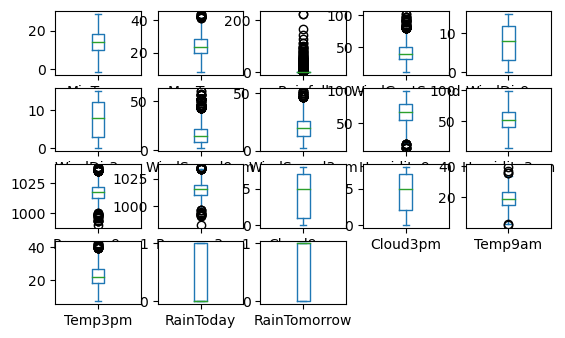

In [106]:
weather.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

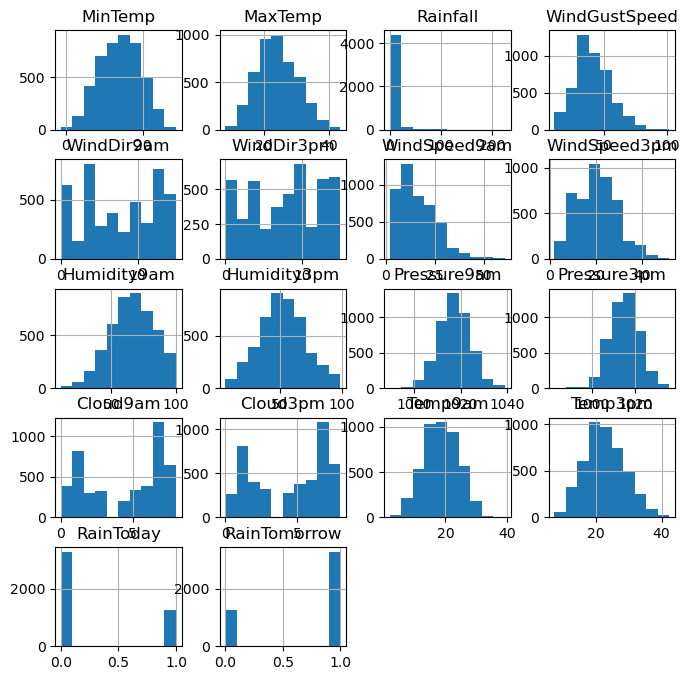

In [107]:
weather.hist(figsize=(8,8),bins=10)
plt.show()

# Scatter Plot

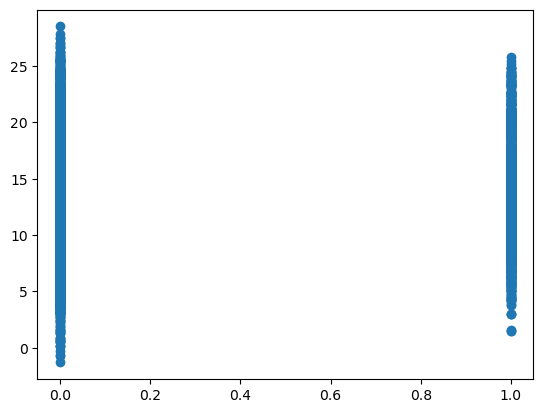

In [109]:
plt.scatter(weather['RainToday'],weather['MinTemp'])
plt.show()

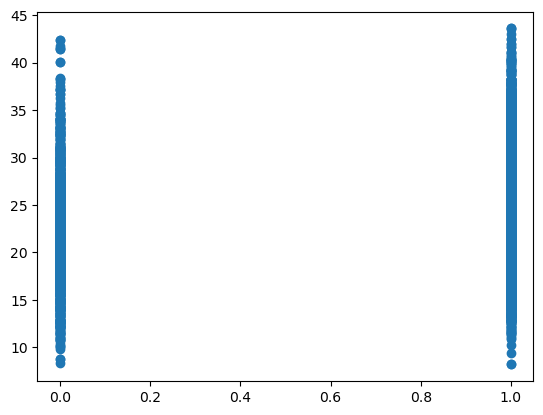

In [110]:
plt.scatter(weather['RainTomorrow'],weather['MaxTemp'])
plt.show()

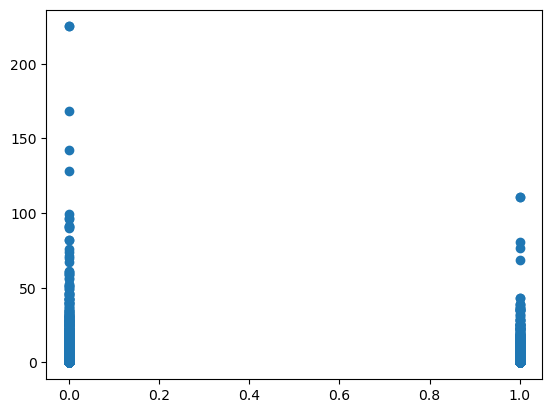

In [116]:
plt.scatter(weather['RainTomorrow'],weather['Rainfall'])
plt.show()

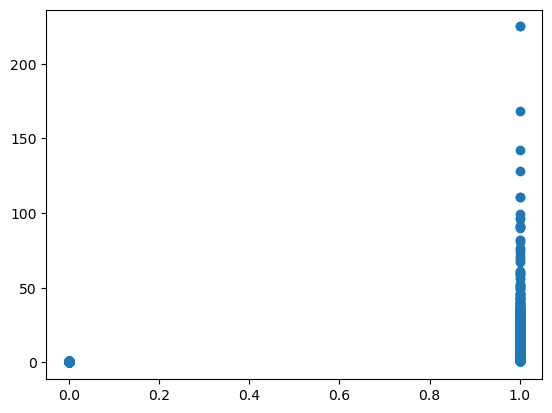

In [117]:
plt.scatter(weather['RainToday'],weather['Rainfall'])
plt.show()

# Cat Plot

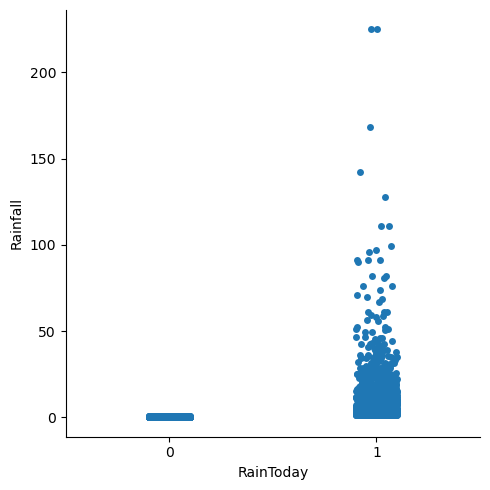

In [124]:
sns.catplot(x='RainToday',y='Rainfall',data=weather)

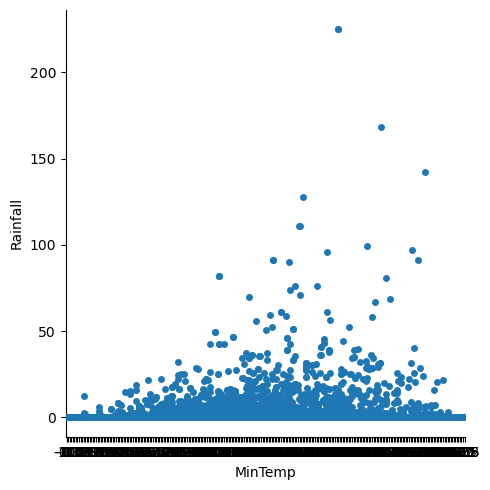

In [121]:
sns.catplot(x='MinTemp',y= 'Rainfall',data=weather)

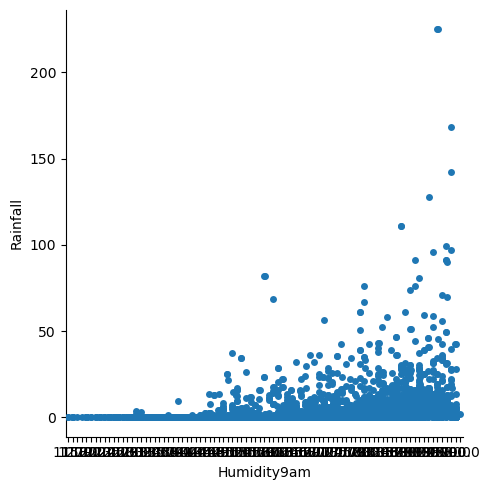

In [122]:
sns.catplot(x='Humidity9am',y= 'Rainfall',data=weather)

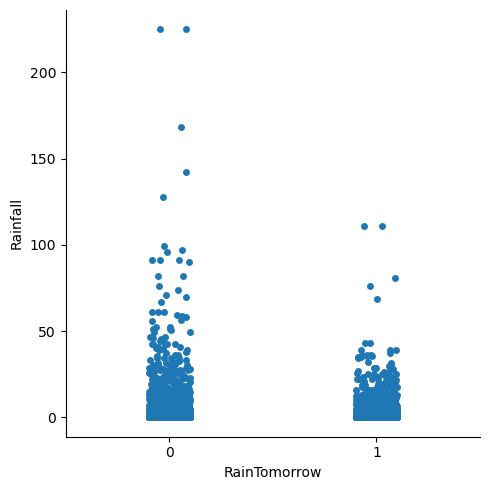

In [123]:
sns.catplot(x='RainTomorrow',y= 'Rainfall',data=weather)

# Pair Plot

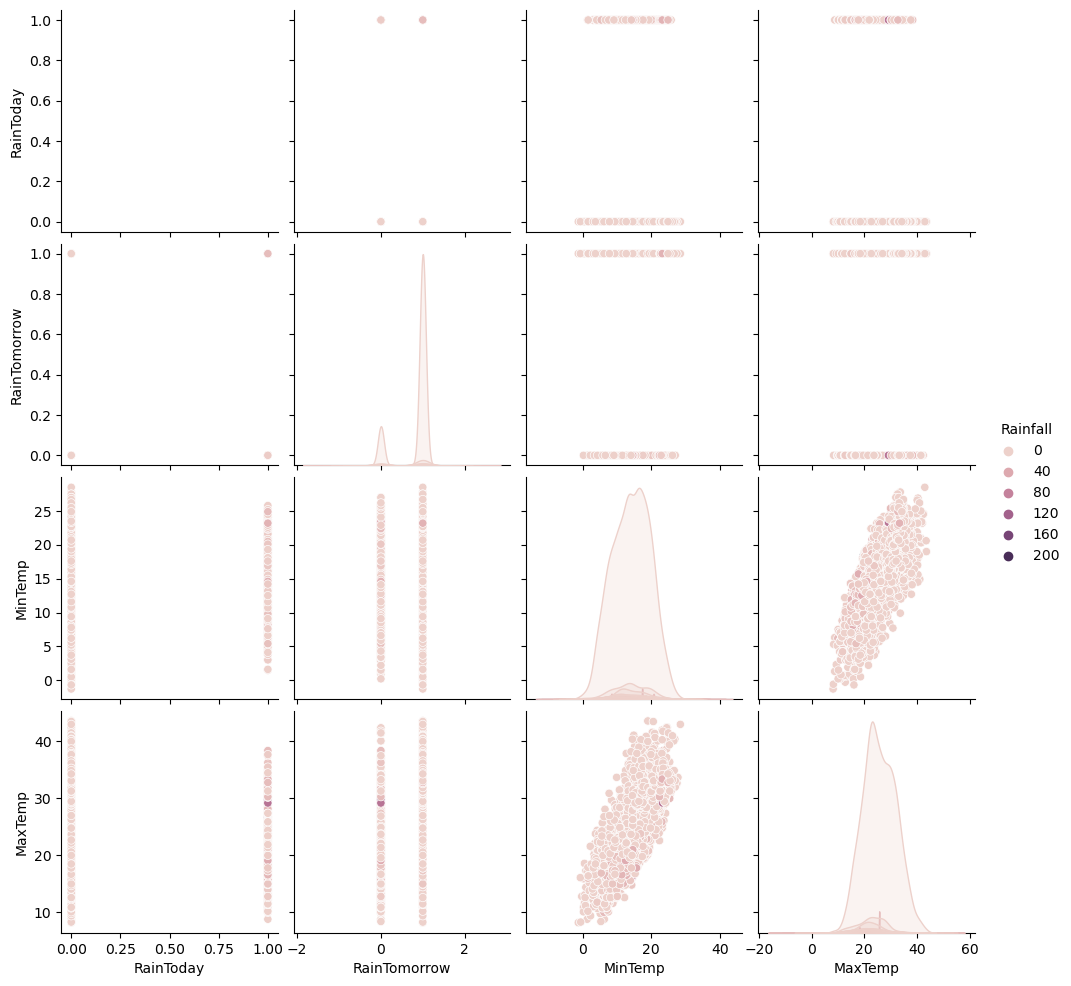

In [125]:
sns.pairplot(data=weather,hue='Rainfall',vars=['RainToday','RainTomorrow','MinTemp','MaxTemp'])

# Joint Plot

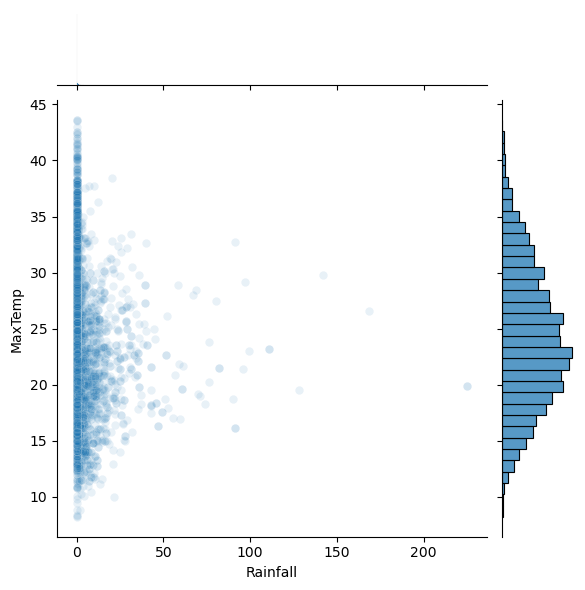

In [126]:
from scipy.stats import pearsonr
sns.jointplot(x='Rainfall', y='MaxTemp', data=weather, alpha=0.1)

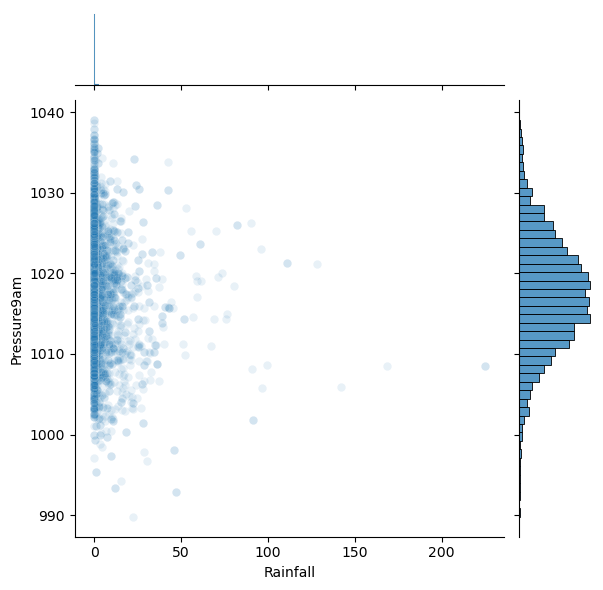

In [127]:
sns.jointplot(x='Rainfall', y='Pressure9am', data=weather, alpha=0.1)

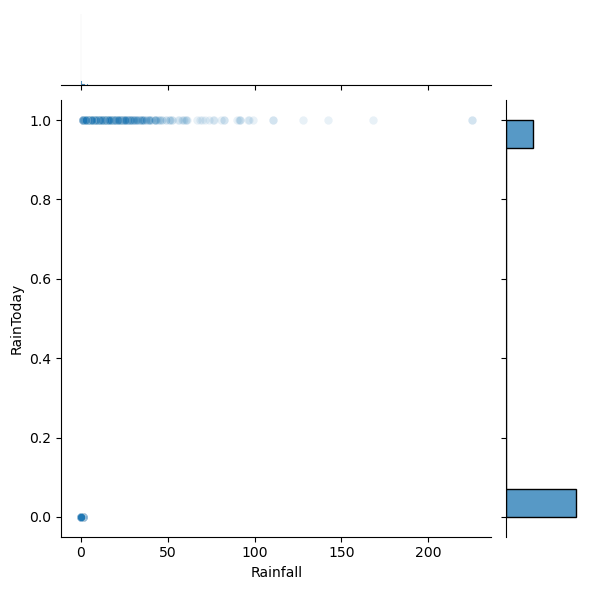

In [128]:
sns.jointplot(x='Rainfall', y='RainToday', data=weather, alpha=0.1)

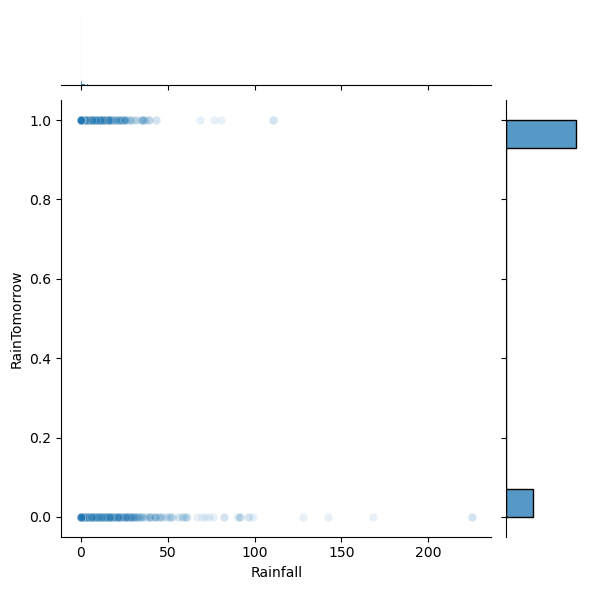

In [129]:
sns.jointplot(x='Rainfall', y='RainTomorrow', data=weather, alpha=0.1)

# Finding Skewness

In [130]:
weather.skew()

MinTemp         -0.047225
MaxTemp          0.270068
Rainfall         8.871544
WindGustSpeed    0.679434
WindDir9am      -0.013100
WindDir3pm      -0.076442
WindSpeed9am     0.953679
WindSpeed3pm     0.366760
Humidity9am     -0.232890
Humidity3pm      0.092467
Pressure9am     -0.011841
Pressure3pm      0.004361
Cloud9am        -0.280365
Cloud3pm        -0.239591
Temp9am         -0.003845
Temp3pm          0.274311
RainToday        1.003048
RainTomorrow    -0.994444
dtype: float64

# Remove outliers using Z Score

In [131]:
from scipy.stats import zscore
z=np.abs(zscore(weather))
z

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,0.661662,1.310915,0.212788,0.025510,1.372057,0.143891,0.976920,0.011722,0.922456,1.038366,0.997574,1.369989,0.878192,1.283281,0.152953,1.159267,0.617284,0.619664
11,0.355444,0.408934,0.099591,0.739430,0.742667,1.435076,0.129411,0.805233,1.335767,2.079464,1.042543,1.641326,1.231069,1.283281,0.492943,0.953244,1.620001,1.613779
12,0.355444,0.911909,1.164450,1.402331,0.323073,0.359089,1.247792,0.895147,0.568190,2.186976,3.470848,3.329646,1.231069,1.283281,0.224530,1.152852,1.620001,1.613779
16,0.010948,0.538734,0.307120,1.381958,0.725911,1.650274,0.553165,1.258668,0.154879,1.595663,0.787721,0.706720,1.231069,1.286108,0.260318,0.770271,0.617284,1.613779
17,0.103883,0.214234,1.277648,1.545116,0.952463,1.362492,1.082859,0.011722,0.804368,0.681816,1.747051,1.942812,1.231069,1.286108,0.117165,0.204717,1.620001,1.613779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,2.077922,1.635415,0.307120,0.168294,1.372057,0.789484,0.082467,0.214995,0.199387,0.339542,0.802710,1.083577,0.878192,0.551997,1.994350,1.741456,0.617284,0.619664
8393,0.106642,0.337416,0.307120,0.311078,0.725911,0.071306,0.294344,0.011722,0.317476,0.877099,0.681254,0.529371,0.878192,1.286108,0.582414,0.377472,0.617284,0.619664
8397,0.256993,0.327809,0.307120,0.311078,1.581854,1.219879,0.294344,0.805233,0.435564,0.984610,1.026013,0.996674,1.231069,1.283281,0.850826,0.287886,0.617284,0.619664
8398,0.888568,0.246684,0.307120,0.453862,0.306317,1.650274,0.341288,0.351798,0.258431,1.092122,1.370773,1.283085,1.231069,0.184941,1.226604,0.071645,0.617284,0.619664


In [132]:
threshold=3
print(np.where(z>3))

(array([   2,    2,    6,    6,   12,   95,  171,  171,  177,  188,  192,
        193,  244,  257,  285,  286,  286,  286,  307,  308,  310,  430,
        475,  509,  513,  536,  537,  627,  681,  682,  742,  743,  744,
        775,  793,  800,  825,  831,  833,  906,  922,  929,  980,  987,
       1015, 1037, 1039, 1045, 1086, 1101, 1107, 1131, 1138, 1163, 1169,
       1171, 1244, 1260, 1267, 1318, 1325, 1353, 1375, 1377, 1383, 1424,
       1439, 1445, 1458, 1458, 1493, 1495, 1544, 1544, 1564, 1575, 1582,
       1597, 1598, 1655, 1695, 1700, 1700, 1715, 1749, 1749, 1753, 1765,
       1765, 1765, 1766, 1770, 1789, 1793, 1796, 1796, 1821, 1837, 1860,
       1874, 1949, 1949, 1952, 1962, 1963, 1963, 1964, 1964, 1964, 1972,
       1989, 1990, 2011, 2013, 2014, 2022, 2022, 2057, 2059, 2108, 2108,
       2128, 2139, 2146, 2161, 2162, 2219, 2259, 2264, 2264, 2279, 2313,
       2313, 2317, 2329, 2329, 2329, 2330, 2334, 2353, 2357, 2360, 2360,
       2385, 2401, 2424, 2438, 2513, 2513, 2516, 2

In [133]:
weather_new=weather[(z<3).all(axis=1)]

In [134]:
weather=weather_new
weather.shape

(4377, 18)

# Training The Data

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [138]:
x_train.shape

(3181, 17)

In [206]:
y_train.shape

(3181,)

In [140]:
x_test.shape

(1364, 17)

In [141]:
y_train.shape

(3181,)

# Fitting The Model

In [142]:
lm=LinearRegression()

In [143]:
lm.fit(x_train,y_train)

LinearRegression()

In [144]:
lm.coef_

array([-1.17581894e-01, -4.02765814e-01,  6.28984185e-02,  1.00988128e-01,
       -4.83673050e-03,  5.74262212e-02, -4.90232224e-02,  4.67924524e-02,
        6.04021388e-02, -8.07587513e-02,  1.32782409e-01,  3.80889686e-02,
       -5.22004134e-02,  1.40656184e-01,  5.81206698e-01,  9.42586772e+00,
       -9.69660259e-01])

In [145]:
lm.intercept_

-65.3168440624015

In [146]:
lm.score(x_train,y_train)

0.28532508786222965

In [148]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result:",pred)
print("actual result:",y_test)

Predicted result: [ 1.4177694  -0.56941985  0.36113542 ... -0.44212577  0.81595043
 12.31448684]
actual result: 6434     0.0
4736     0.0
4661     0.0
5617     0.0
5011     3.2
        ... 
5123     0.0
7403     0.0
5963     0.0
7241     0.0
4207    10.6
Name: Rainfall, Length: 1364, dtype: float64


In [149]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 3.644568167603264
Mean squared error: 120.75513384365664
Root mean squared error: 10.988864083409924


In [150]:
knn=KNeighborsRegressor()

In [151]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [152]:
predknn=knn.predict(x_test)

In [153]:
knn.score(x_train,y_train)

0.4229621071969434

In [154]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 3.780307917888563
Mean squared error: 111.45938739002933
r2 score 0.30836626301458325


In [155]:
svm=SVR()

In [156]:
svm.fit(x_train,y_train)

SVR()

In [157]:
predsvm=svm.predict(x_test)

In [158]:
svm.score(x_train,y_train)

-0.07897224790964197

In [159]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 3.7386831432898955
Mean squared error: 172.4073343663984
r2 score -0.06983118913314001


In [160]:
dtc=DecisionTreeRegressor()

In [161]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [162]:
preddtc=dtc.predict(x_test)

In [163]:
dtc.score(x_train,y_train)

1.0

In [164]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 2.709384164222874
Mean squared error: 115.36651026392963
r2 score 0.28412157571264496


In [165]:
rfc=RandomForestRegressor()

In [166]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [167]:
predrfc=rfc.predict(x_test)

In [168]:
rfc.score(x_train,y_train)

0.9211228938890378

In [169]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 2.3366026392961876
Mean squared error: 68.26150552785924
r2 score 0.5764200641505828


In [170]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [171]:
#testing the model
predl=lasso.predict(x_test)

In [172]:
lasso.score(x_train,y_train)

0.2831567828533115

In [173]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predl))
print('Mean squared error:',mean_squared_error(y_test,predl))
print('r2 score',(r2_score(y_test,predl)))

error:
Mean absolute error: 3.594381249226858
Mean squared error: 121.41578343104126
r2 score 0.24658430312765944


In [174]:

# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [175]:
#testing the model
predr=ridge.predict(x_test)

In [176]:
ridge.score(x_train,y_train)

0.2853250806722575

In [177]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predr))
print('Mean squared error:',mean_squared_error(y_test,predr))
print('r2 score',(r2_score(y_test,predr)))

error:
Mean absolute error: 3.644548815846186
Mean squared error: 120.7554817631838
r2 score 0.25068164226410994


# Cross Validation Score

In [178]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [179]:
print('The Best score for Linear Model is',score.mean())


The Best score for Linear Model is 0.29499025079537794


In [183]:

k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)

In [184]:
print('The Best score for Decision Tree Regressor is',score.mean())

The Best score for Decision Tree Regressor is 0.1250902086300419


In [185]:

k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)

In [186]:
print('The Best score for Random Forest  Regressor is',score.mean())

The Best score for Random Forest  Regressor is 0.4079680282822203


In [187]:

k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)

In [188]:
print('The Best score for KNN Model is',score.mean())

The Best score for KNN Model is 0.1111087152069413


In [189]:

k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)

In [190]:
print('The Best score for LASSO Model is',score.mean())

The Best score for LASSO Model is 0.2938442259136531


In [191]:

k_folds=KFold(n_splits=5)
score=cross_val_score(ridge,x_train,y_train,cv=k_folds)

In [192]:
print('The Best score for Ridge Model is',score.mean())

The Best score for Ridge Model is 0.294990039835728


In [195]:

k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)

In [197]:
print('The Best score for SVC Model is',score.mean())

The Best score for SVC Model is -0.0853082709939517


# Hyperparameter tuning of the best method

In [198]:
#estimating the parameters
param_grid={'n_estimators':[70,30],'max_features':['auto','sqrt'],'min_samples_split':[10,6],'min_samples_leaf':[9,9],'bootstrap':[True,False]}

In [199]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=100,verbose=7,cv=5,random_state=52,n_jobs=4)

In [200]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [9, 9],
                                        'min_samples_split': [10, 6],
                                        'n_estimators': [70, 30]})

In [201]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 70, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': False}
Best Score 0.40658425384553587


In [202]:
r_fit=RandomForestRegressor(n_estimators= 70, min_samples_split= 6, min_samples_leaf= 9, max_features='sqrt', bootstrap=False)

In [203]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=9,
                      min_samples_split=6, n_estimators=70)

In [204]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [205]:
df

,Actual Data,predicted Data
6434,0.0,0.950053
4736,0.0,0.149913
4661,0.0,0.030728
5617,0.0,5.781555
5011,3.2,5.136191
...,...,...
5123,0.0,0.185590
7403,0.0,0.015306
5963,0.0,0.185645
7241,0.0,0.048811


In [ ]:
#Random Forest Regressor is the selected method selected on the basis of cross validation score

# Saving The Best Model

In [207]:
import pickle

In [208]:
saved_model=pickle.dumps(rfc)

In [209]:
rfc_from_pickle=pickle.loads(saved_model)

In [210]:
rfc_from_pickle.predict(x_test)

array([1.5000e-01, 1.5800e-01, 1.4000e-02, ..., 2.0000e-02, 0.0000e+00,
       1.5356e+01])